In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  linear_model

## Importing the data

In [3]:
data = pd.read_csv("neonatal_24h.csv", names=[
    'ID', 'time', 'ABP_S', 'ABP_M', 'ABP_D','HR_ECG', 'SpO2'])

IDs = np.unique(data['ID'])

data_per_ID = []
for ID in IDs:
    data_per_ID.append(data.loc[data['ID']==ID].sort_values('time'))

### Visualisation of one ID

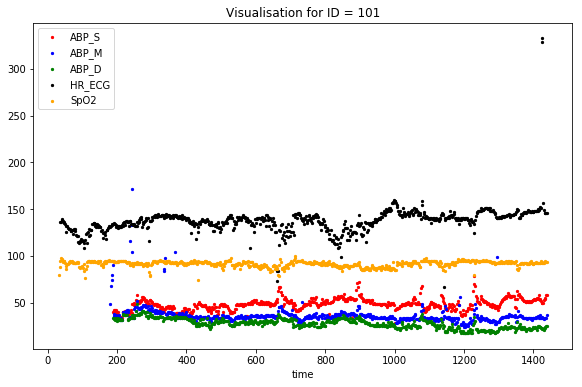

In [4]:
features = ['ABP_S', 'ABP_M', 'ABP_D','HR_ECG', 'SpO2']
col = ['red', 'blue', 'green', 'black' , 'orange']

fig = plt.figure(figsize=(1.61 * 6, 6))
ax = fig.add_subplot(1, 1, 1)
ID = 100

for y, c in zip(features, col):
    data_per_ID[ID].plot(x='time', y=y,  
                         marker='.', kind='scatter', ax=ax, label=y, color=c)
plt.title('Visualisation for ID = ' + str(IDs[ID]) )
plt.ylabel('');

### extract additional features like mean and variance and also slope and intercept of a linear regression

In [42]:
mean = []
var = []
slope = []
intercept = []

for i in range(len(IDs)):
    m = []
    v = []
    s = []
    inter = []
    for j, feature in enumerate(features):
        # extract mean and variance
        m.append(np.nanmean(data_per_ID[i], axis=0)[j])
        v.append(np.nanvar(data_per_ID[i], axis=0)[j])
        
        # create linear regression object
        regr = linear_model.LinearRegression(fit_intercept=True)
        
        # select time as x and feature as y 
        df = data_per_ID[0][['time', feature]].dropna()
        x = np.array(df['time']).reshape(-1, 1)
        y = df[feature]
        
        if len(df) > 1:
            # train the model using the training sets
            regr.fit(x,y)
            s.append(regr.coef_[0])
            inter.append(regr.intercept_)
        else:
            s.append(np.nan)
            inter.append(np.nan)

    mean.append(m)
    var.append(v)
    slope.append(s)
    intercept.append(inter)
    
mean = np.array(mean)
var = np.array(var)
slope = np.array(slope)
intercept = np.array(intercept)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  


### save arrays for future analysis

In [45]:
np.savetxt('mean.csv', mean, delimiter=',')
np.savetxt('var.csv', var, delimiter=',')
np.savetxt('slope.csv', slope, delimiter=',')
np.savetxt('intercept.csv', intercept, delimiter=',')
np.savetxt('IDs.csv', IDs, delimiter=',', fmt='%i')

In [46]:
timeseries = []
for i in range(len(IDs)):
    ts = []
    ts.append(IDs[i])
    for j in range(mean.shape[1]):
        ts.append(mean[i][j])
        ts.append(var[i][j])
        ts.append(slope[i][j])
        ts.append(intercept[i][j])
    timeseries.append(ts)
timeseries = np.array(timeseries)

In [47]:
np.savetxt('timeseries.csv', timeseries, delimiter=',')
# order of the file:

# ID1	 mean ABP_S		 var ABP_S		 slope ABP_S		 intercept ABP_S
#		mean ABP_M		 var ABP_M		 slope ABP_M		 intercept ABP_M
#		mean ABP_D		 var ABP_D		 slope ABP_D		 intercept ABP_D
#		mean HR_ECG		 var HR_ECG		 slope HR_ECG		 intercept HR_ECG
#		mean SpO2		 var SpO2		 slope SpO2			 intercept SpO2

# in total ID + (mean, var, slope, intercept) * ('ABP_S', 'ABP_M', 'ABP_D','HR_ECG', 'SpO2') = 1 + 20 columns 


In [48]:
print(timeseries.shape)

(700, 21)
